In [67]:
from pathlib import Path
import os

from astropy.nddata import CCDData
from astropy.visualization import hist
import ccdproc as ccdp
import matplotlib.pyplot as plt
import numpy as np

from convenience_functions import show_image

from astropy.stats import mad_std

In [68]:
reduced_path=Path("reduced")
bs_path=Path("bs")
ff_path=Path('ff')
obj_path=Path("obj")

In [69]:
bs_files=ccdp.ImageFileCollection(bs_path)
ff_files=ccdp.ImageFileCollection(ff_path)
obj_files=ccdp.ImageFileCollection(obj_path)
reduced_files=ccdp.ImageFileCollection(reduced_path)

In [70]:
from astropy.io import fits
def ovregion(filename):
    ccd=CCDData.read(filename)
    det_id=ccd.header['det-id']
    bin_id=ccd.header['BIN-FCT1']
    if bin_id==1 or bin_id==0:
        if det_id==1:
            col=list(np.arange(520,535)) + list(np.arange(537,552)) + list(np.arange(1592,1607)) + list(np.arange(1610,1625))
        else:
            col=list(np.arange(520,535)) + list(np.arange(537,552)) + list(np.arange(1592,1607)) + list(np.arange(1610,1624))
    if bin_id==2:
        if det_id==1:
            col=list(np.arange(260,275)) + list(np.arange(277,292)) + list(np.arange(812,827)) + list(np.arange(830,845))
        else:
            col=list(np.arange(260,275)) + list(np.arange(277,292)) + list(np.arange(812,827)) + list(np.arange(830,844))
    if bin_id==4:
        if det_id==1:
            col=list(np.arange(130,145)) + list(np.arange(147,162)) + list(np.arange(422,437)) + list(np.arange(441,455))
        else:
            col=list(np.arange(130,145)) + list(np.arange(147,162)) + list(np.arange(422,437)) + list(np.arange(441,454))
    return ccd[:,col], list(set(np.arange(ccd.data.shape[1])).difference(col))

# bias subtraction

In [71]:
for ccd, filename in bs_files.ccds(return_fname=True):
    ovsub,col=ovregion("bs/"+filename)
    ccd=ccdp.subtract_overscan(ccd, overscan=ovsub,median=True)
    ccd=ccdp.trim_image(ccd[:,col])
    ccd.write(reduced_path / filename, overwrite=True)

this form of the PCi_ja keyword is deprecated, use PCi_ja. [astropy.wcs.wcs]
this form of the PCi_ja keyword is deprecated, use PCi_ja.
this form of the PCi_ja keyword is deprecated, use PCi_ja. [astropy.wcs.wcs]
this form of the PCi_ja keyword is deprecated, use PCi_ja.
this form of the PCi_ja keyword is deprecated, use PCi_ja. [astropy.wcs.wcs]
this form of the PCi_ja keyword is deprecated, use PCi_ja.
this form of the PCi_ja keyword is deprecated, use PCi_ja. [astropy.wcs.wcs]
this form of the PCi_ja keyword is deprecated, use PCi_ja.
the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
the RADECSYS keyword is deprecated, use RADESYSa.
Set DATE-END to '2019-05-12T14:28:56.994' from MJD-END'. [astropy.wcs.wcs]
Set DATE-END to '2019-05-12T14:28:56.994' from MJD-END'.
  'degree' -> 'deg'. [astropy.wcs.wcs]
  'degree' -> 'deg'.
Set DATE-END to '2019-05-12T14:29:26.455' from MJD-END'. [astropy.wcs.wcs]
Set DATE-END to '2019-05-12T14:29:26.455' from MJD-END'.
Set DATE-END t

In [72]:
reduced_files.refresh()
bs_key={'data-typ':'BIAS'}
rd_bs_fname=reduced_files.files_filtered(**bs_key,include_path=True)

this form of the PCi_ja keyword is deprecated, use PCi_ja. [astropy.wcs.wcs]
this form of the PCi_ja keyword is deprecated, use PCi_ja.
this form of the PCi_ja keyword is deprecated, use PCi_ja. [astropy.wcs.wcs]
this form of the PCi_ja keyword is deprecated, use PCi_ja.
this form of the PCi_ja keyword is deprecated, use PCi_ja. [astropy.wcs.wcs]
this form of the PCi_ja keyword is deprecated, use PCi_ja.
this form of the PCi_ja keyword is deprecated, use PCi_ja. [astropy.wcs.wcs]
this form of the PCi_ja keyword is deprecated, use PCi_ja.
the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
the RADECSYS keyword is deprecated, use RADESYSa.
Set DATE-END to '2019-05-12T14:28:56.994' from MJD-END'. [astropy.wcs.wcs]
Set DATE-END to '2019-05-12T14:28:56.994' from MJD-END'.
  'degree' -> 'deg'. [astropy.wcs.wcs]
  'degree' -> 'deg'.


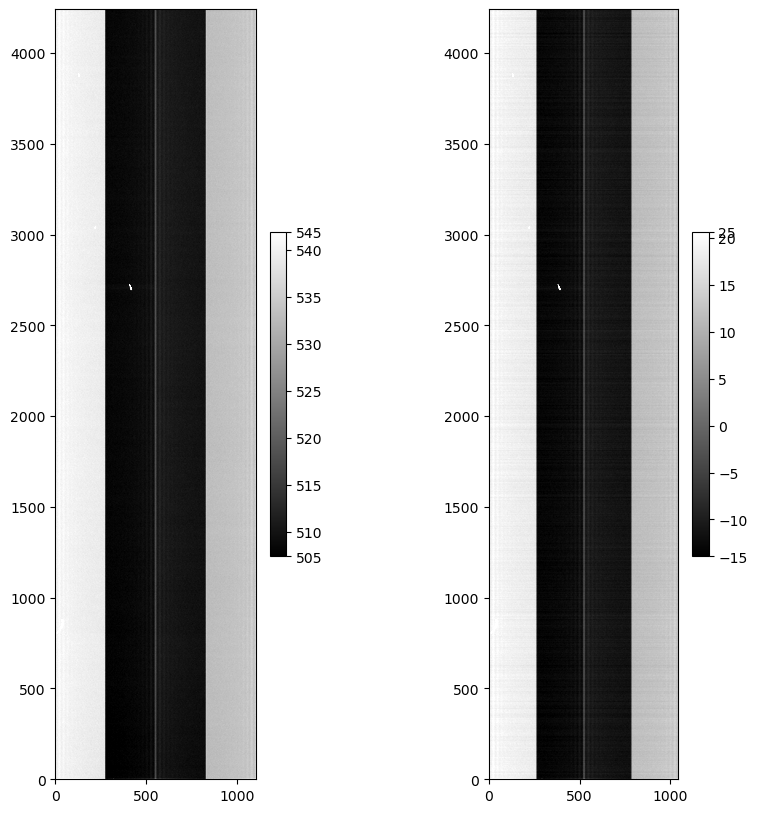

In [73]:
fig, (ax1,ax2)=plt.subplots(1,2,figsize=(10,10))

show_image(CCDData.read('bs/FCSA00209447.fits'),cmap='gray', ax=ax1, fig=fig)
show_image(CCDData.read('reduced/FCSA00209447.fits'),cmap='gray',ax=ax2,fig=fig)

In [74]:
combined_bias=ccdp.combine(rd_bs_fname,
                           method='average',
                           sigma_clip=True, sigma_clip_low_thresh=5, sigma_clip_high_thresh=5,
                           sigma_clip_func=np.ma.median, sigma_clip_dev_func=mad_std)
combined_bias.meta['combined']=True
combined_bias.write(reduced_path / 'std_bias.fits',overwrite=True)

Set DATE-END to '2019-05-12T14:29:26.455' from MJD-END'. [astropy.wcs.wcs]
Set DATE-END to '2019-05-12T14:29:26.455' from MJD-END'.
Set DATE-END to '2019-05-12T14:29:50.558' from MJD-END'. [astropy.wcs.wcs]
Set DATE-END to '2019-05-12T14:29:50.558' from MJD-END'.
Set DATE-END to '2019-05-12T14:30:13.540' from MJD-END'. [astropy.wcs.wcs]
Set DATE-END to '2019-05-12T14:30:13.540' from MJD-END'.
Set DATE-END to '2019-05-12T14:30:37.473' from MJD-END'. [astropy.wcs.wcs]
Set DATE-END to '2019-05-12T14:30:37.473' from MJD-END'.


In [75]:
for ccd, filename in ff_files.ccds(return_fname=True):
    ovsub, col= ovregion("ff/"+filename)
    ccd=ccdp.subtract_overscan(ccd, overscan=ovsub,median=True)
    
    ccd=ccdp.trim_image(ccd[:,col])
    
    ccd=ccdp.subtract_bias(ccd, combined_bias)
    
    ccd.write(reduced_path / filename, overwrite=True)
    

this form of the PCi_ja keyword is deprecated, use PCi_ja. [astropy.wcs.wcs]
this form of the PCi_ja keyword is deprecated, use PCi_ja.
this form of the PCi_ja keyword is deprecated, use PCi_ja. [astropy.wcs.wcs]
this form of the PCi_ja keyword is deprecated, use PCi_ja.
this form of the PCi_ja keyword is deprecated, use PCi_ja. [astropy.wcs.wcs]
this form of the PCi_ja keyword is deprecated, use PCi_ja.
this form of the PCi_ja keyword is deprecated, use PCi_ja. [astropy.wcs.wcs]
this form of the PCi_ja keyword is deprecated, use PCi_ja.
the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
the RADECSYS keyword is deprecated, use RADESYSa.
Set DATE-END to '2019-05-12T15:02:49.377' from MJD-END'. [astropy.wcs.wcs]
Set DATE-END to '2019-05-12T15:02:49.377' from MJD-END'.
  'degree' -> 'deg'. [astropy.wcs.wcs]
  'degree' -> 'deg'.
INFO:astropy:An exception happened while extracting WCS information from the Header.
InconsistentAxisTypesError: ERROR 4 in wcs_types() at line 31

INFO: An exception happened while extracting WCS information from the Header.
InconsistentAxisTypesError: ERROR 4 in wcs_types() at line 3104 of file cextern/wcslib/C/wcs.c:
Unmatched celestial axes.
 [astropy.nddata.ccddata]
INFO: An exception happened while extracting WCS information from the Header.
InconsistentAxisTypesError: ERROR 4 in wcs_types() at line 3104 of file cextern/wcslib/C/wcs.c:
Unmatched celestial axes.
 [astropy.nddata.ccddata]
INFO: An exception happened while extracting WCS information from the Header.
InconsistentAxisTypesError: ERROR 4 in wcs_types() at line 3104 of file cextern/wcslib/C/wcs.c:
Unmatched celestial axes.
 [astropy.nddata.ccddata]


INFO:astropy:An exception happened while extracting WCS information from the Header.
InconsistentAxisTypesError: ERROR 4 in wcs_types() at line 3104 of file cextern/wcslib/C/wcs.c:
Unmatched celestial axes.

Set DATE-END to '2019-05-12T15:04:01.447' from MJD-END'. [astropy.wcs.wcs]
Set DATE-END to '2019-05-12T15:04:01.447' from MJD-END'.
INFO:astropy:An exception happened while extracting WCS information from the Header.
InconsistentAxisTypesError: ERROR 4 in wcs_types() at line 3104 of file cextern/wcslib/C/wcs.c:
Unmatched celestial axes.

INFO:astropy:An exception happened while extracting WCS information from the Header.
InconsistentAxisTypesError: ERROR 4 in wcs_types() at line 3104 of file cextern/wcslib/C/wcs.c:
Unmatched celestial axes.



INFO: An exception happened while extracting WCS information from the Header.
InconsistentAxisTypesError: ERROR 4 in wcs_types() at line 3104 of file cextern/wcslib/C/wcs.c:
Unmatched celestial axes.
 [astropy.nddata.ccddata]
INFO: An exception happened while extracting WCS information from the Header.
InconsistentAxisTypesError: ERROR 4 in wcs_types() at line 3104 of file cextern/wcslib/C/wcs.c:
Unmatched celestial axes.
 [astropy.nddata.ccddata]
INFO: An exception happened while extracting WCS information from the Header.
InconsistentAxisTypesError: ERROR 4 in wcs_types() at line 3104 of file cextern/wcslib/C/wcs.c:
Unmatched celestial axes.
 [astropy.nddata.ccddata]


Set DATE-END to '2019-05-12T15:04:37.402' from MJD-END'. [astropy.wcs.wcs]
Set DATE-END to '2019-05-12T15:04:37.402' from MJD-END'.
INFO:astropy:An exception happened while extracting WCS information from the Header.
InconsistentAxisTypesError: ERROR 4 in wcs_types() at line 3104 of file cextern/wcslib/C/wcs.c:
Unmatched celestial axes.

INFO:astropy:An exception happened while extracting WCS information from the Header.
InconsistentAxisTypesError: ERROR 4 in wcs_types() at line 3104 of file cextern/wcslib/C/wcs.c:
Unmatched celestial axes.

Set DATE-END to '2019-05-12T15:05:13.969' from MJD-END'. [astropy.wcs.wcs]
Set DATE-END to '2019-05-12T15:05:13.969' from MJD-END'.
INFO:astropy:An exception happened while extracting WCS information from the Header.
InconsistentAxisTypesError: ERROR 4 in wcs_types() at line 3104 of file cextern/wcslib/C/wcs.c:
Unmatched celestial axes.

INFO:astropy:An exception happened while extracting WCS information from the Header.
InconsistentAxisTypesError:

INFO: An exception happened while extracting WCS information from the Header.
InconsistentAxisTypesError: ERROR 4 in wcs_types() at line 3104 of file cextern/wcslib/C/wcs.c:
Unmatched celestial axes.
 [astropy.nddata.ccddata]
INFO: An exception happened while extracting WCS information from the Header.
InconsistentAxisTypesError: ERROR 4 in wcs_types() at line 3104 of file cextern/wcslib/C/wcs.c:
Unmatched celestial axes.
 [astropy.nddata.ccddata]
INFO: An exception happened while extracting WCS information from the Header.
InconsistentAxisTypesError: ERROR 4 in wcs_types() at line 3104 of file cextern/wcslib/C/wcs.c:
Unmatched celestial axes.
 [astropy.nddata.ccddata]
INFO: An exception happened while extracting WCS information from the Header.
InconsistentAxisTypesError: ERROR 4 in wcs_types() at line 3104 of file cextern/wcslib/C/wcs.c:
Unmatched celestial axes.
 [astropy.nddata.ccddata]


# Falt feilding

In [76]:
ff_key={'data-typ':'DOMEFLAT'}
rd_ff_fname=reduced_files.files_filtered(**ff_key,include_path=True)

In [77]:
def inv_median(a):##now we try to follow the iraf pipline
    return 1 / 10000
combined_flat=ccdp.combine(rd_ff_fname,
                           method='average', scale=inv_median,
                           sigma_clip=True, sigma_clip_low_thresh=5, sigma_clip_high_thresh=5,
                           sigma_clip_func=np.ma.median, signma_clip_dev_func=mad_std)

INFO:astropy:An exception happened while extracting WCS information from the Header.
InconsistentAxisTypesError: ERROR 4 in wcs_types() at line 3104 of file cextern/wcslib/C/wcs.c:
Unmatched celestial axes.

INFO:astropy:An exception happened while extracting WCS information from the Header.
InconsistentAxisTypesError: ERROR 4 in wcs_types() at line 3104 of file cextern/wcslib/C/wcs.c:
Unmatched celestial axes.

INFO:astropy:An exception happened while extracting WCS information from the Header.
InconsistentAxisTypesError: ERROR 4 in wcs_types() at line 3104 of file cextern/wcslib/C/wcs.c:
Unmatched celestial axes.

INFO:astropy:An exception happened while extracting WCS information from the Header.
InconsistentAxisTypesError: ERROR 4 in wcs_types() at line 3104 of file cextern/wcslib/C/wcs.c:
Unmatched celestial axes.

INFO:astropy:An exception happened while extracting WCS information from the Header.
InconsistentAxisTypesError: ERROR 4 in wcs_types() at line 3104 of file cextern/wcs

INFO: An exception happened while extracting WCS information from the Header.
InconsistentAxisTypesError: ERROR 4 in wcs_types() at line 3104 of file cextern/wcslib/C/wcs.c:
Unmatched celestial axes.
 [astropy.nddata.ccddata]
INFO: An exception happened while extracting WCS information from the Header.
InconsistentAxisTypesError: ERROR 4 in wcs_types() at line 3104 of file cextern/wcslib/C/wcs.c:
Unmatched celestial axes.
 [astropy.nddata.ccddata]
INFO: An exception happened while extracting WCS information from the Header.
InconsistentAxisTypesError: ERROR 4 in wcs_types() at line 3104 of file cextern/wcslib/C/wcs.c:
Unmatched celestial axes.
 [astropy.nddata.ccddata]
INFO: An exception happened while extracting WCS information from the Header.
InconsistentAxisTypesError: ERROR 4 in wcs_types() at line 3104 of file cextern/wcslib/C/wcs.c:
Unmatched celestial axes.
 [astropy.nddata.ccddata]
INFO: An exception happened while extracting WCS information from the Header.
InconsistentAxisTy

INFO:astropy:An exception happened while extracting WCS information from the Header.
InconsistentAxisTypesError: ERROR 4 in wcs_types() at line 3104 of file cextern/wcslib/C/wcs.c:
Unmatched celestial axes.

INFO:astropy:An exception happened while extracting WCS information from the Header.
InconsistentAxisTypesError: ERROR 4 in wcs_types() at line 3104 of file cextern/wcslib/C/wcs.c:
Unmatched celestial axes.

INFO:astropy:An exception happened while extracting WCS information from the Header.
InconsistentAxisTypesError: ERROR 4 in wcs_types() at line 3104 of file cextern/wcslib/C/wcs.c:
Unmatched celestial axes.

INFO:astropy:An exception happened while extracting WCS information from the Header.
InconsistentAxisTypesError: ERROR 4 in wcs_types() at line 3104 of file cextern/wcslib/C/wcs.c:
Unmatched celestial axes.

INFO:astropy:An exception happened while extracting WCS information from the Header.
InconsistentAxisTypesError: ERROR 4 in wcs_types() at line 3104 of file cextern/wcs

INFO: An exception happened while extracting WCS information from the Header.
InconsistentAxisTypesError: ERROR 4 in wcs_types() at line 3104 of file cextern/wcslib/C/wcs.c:
Unmatched celestial axes.
 [astropy.nddata.ccddata]
INFO: An exception happened while extracting WCS information from the Header.
InconsistentAxisTypesError: ERROR 4 in wcs_types() at line 3104 of file cextern/wcslib/C/wcs.c:
Unmatched celestial axes.
 [astropy.nddata.ccddata]
INFO: An exception happened while extracting WCS information from the Header.
InconsistentAxisTypesError: ERROR 4 in wcs_types() at line 3104 of file cextern/wcslib/C/wcs.c:
Unmatched celestial axes.
 [astropy.nddata.ccddata]
INFO: An exception happened while extracting WCS information from the Header.
InconsistentAxisTypesError: ERROR 4 in wcs_types() at line 3104 of file cextern/wcslib/C/wcs.c:
Unmatched celestial axes.
 [astropy.nddata.ccddata]
INFO: An exception happened while extracting WCS information from the Header.
InconsistentAxisTy

<Figure size 1000x1000 with 0 Axes>

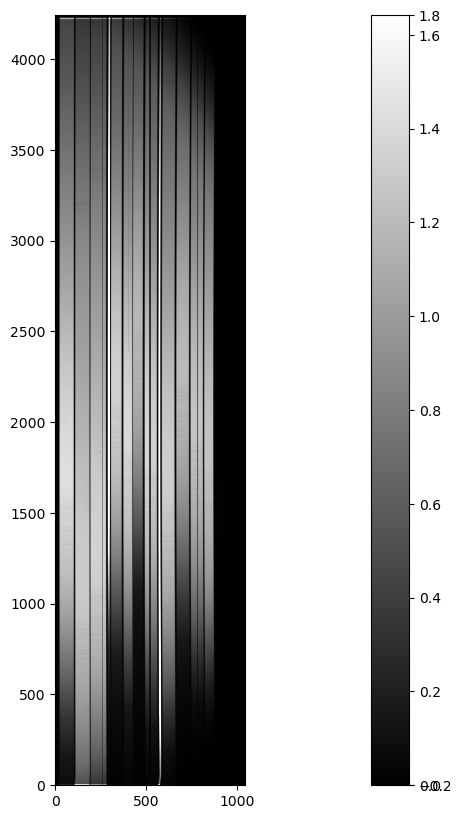

In [78]:
plt.figure(figsize=(10,10))
show_image(combined_flat,cmap="gray")

In [79]:
combined_flat.meta['combined']=True
combined_flat.write(reduced_path / "flat.fits",overwrite=True)

# Deal with objects

In [80]:
raw_ccd=list()
reduced_ccd=list()
for ccd, filename in obj_files.ccds(return_fname=True):
    ovsub, col=ovregion("obj/"+filename)
    raw_ccd.append(ccd)
    ccd=ccdp.subtract_overscan(ccd, overscan=ovsub,median=True)
    ccd=ccdp.trim_image(ccd[:,col])
    ccd=ccdp.subtract_bias(ccd,combined_bias)
    ccd=ccdp.flat_correct(ccd, combined_flat)
    reduced_ccd.append(ccd)
    ccd.write(reduced_path / filename, overwrite=True)

this form of the PCi_ja keyword is deprecated, use PCi_ja. [astropy.wcs.wcs]
this form of the PCi_ja keyword is deprecated, use PCi_ja.
this form of the PCi_ja keyword is deprecated, use PCi_ja. [astropy.wcs.wcs]
this form of the PCi_ja keyword is deprecated, use PCi_ja.
this form of the PCi_ja keyword is deprecated, use PCi_ja. [astropy.wcs.wcs]
this form of the PCi_ja keyword is deprecated, use PCi_ja.
this form of the PCi_ja keyword is deprecated, use PCi_ja. [astropy.wcs.wcs]
this form of the PCi_ja keyword is deprecated, use PCi_ja.
the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
the RADECSYS keyword is deprecated, use RADESYSa.
Set DATE-END to '2019-05-12T12:46:07.176' from MJD-END'. [astropy.wcs.wcs]
Set DATE-END to '2019-05-12T12:46:07.176' from MJD-END'.
  'degree' -> 'deg'. [astropy.wcs.wcs]
  'degree' -> 'deg'.
INFO:astropy:An exception happened while extracting WCS information from the Header.
InconsistentAxisTypesError: ERROR 4 in wcs_types() at line 31

INFO: An exception happened while extracting WCS information from the Header.
InconsistentAxisTypesError: ERROR 4 in wcs_types() at line 3104 of file cextern/wcslib/C/wcs.c:
Unmatched celestial axes.
 [astropy.nddata.ccddata]
INFO: An exception happened while extracting WCS information from the Header.
InconsistentAxisTypesError: ERROR 4 in wcs_types() at line 3104 of file cextern/wcslib/C/wcs.c:
Unmatched celestial axes.
 [astropy.nddata.ccddata]


/home/zero/anaconda3/envs/ccd/lib/python3.9/site-packages/astropy/nddata/nduncertainty.py:684: RuntimeWarning: divide by zero encountered in true_divide
  return from_variance((left + right + correlation_sign * corr) /
/home/zero/anaconda3/envs/ccd/lib/python3.9/site-packages/astropy/nddata/nduncertainty.py:684: RuntimeWarning: invalid value encountered in true_divide
  return from_variance((left + right + correlation_sign * corr) /
Set DATE-END to '2019-05-12T13:06:36.283' from MJD-END'. [astropy.wcs.wcs]
Set DATE-END to '2019-05-12T13:06:36.283' from MJD-END'.
INFO:astropy:An exception happened while extracting WCS information from the Header.
InconsistentAxisTypesError: ERROR 4 in wcs_types() at line 3104 of file cextern/wcslib/C/wcs.c:
Unmatched celestial axes.

INFO:astropy:An exception happened while extracting WCS information from the Header.
InconsistentAxisTypesError: ERROR 4 in wcs_types() at line 3104 of file cextern/wcslib/C/wcs.c:
Unmatched celestial axes.



INFO: An exception happened while extracting WCS information from the Header.
InconsistentAxisTypesError: ERROR 4 in wcs_types() at line 3104 of file cextern/wcslib/C/wcs.c:
Unmatched celestial axes.
 [astropy.nddata.ccddata]
INFO: An exception happened while extracting WCS information from the Header.
InconsistentAxisTypesError: ERROR 4 in wcs_types() at line 3104 of file cextern/wcslib/C/wcs.c:
Unmatched celestial axes.
 [astropy.nddata.ccddata]


Set DATE-END to '2019-05-12T13:27:05.831' from MJD-END'. [astropy.wcs.wcs]
Set DATE-END to '2019-05-12T13:27:05.831' from MJD-END'.
INFO:astropy:An exception happened while extracting WCS information from the Header.
InconsistentAxisTypesError: ERROR 4 in wcs_types() at line 3104 of file cextern/wcslib/C/wcs.c:
Unmatched celestial axes.

INFO:astropy:An exception happened while extracting WCS information from the Header.
InconsistentAxisTypesError: ERROR 4 in wcs_types() at line 3104 of file cextern/wcslib/C/wcs.c:
Unmatched celestial axes.



INFO: An exception happened while extracting WCS information from the Header.
InconsistentAxisTypesError: ERROR 4 in wcs_types() at line 3104 of file cextern/wcslib/C/wcs.c:
Unmatched celestial axes.
 [astropy.nddata.ccddata]
INFO: An exception happened while extracting WCS information from the Header.
InconsistentAxisTypesError: ERROR 4 in wcs_types() at line 3104 of file cextern/wcslib/C/wcs.c:
Unmatched celestial axes.
 [astropy.nddata.ccddata]


Set DATE-END to '2019-05-12T13:47:34.349' from MJD-END'. [astropy.wcs.wcs]
Set DATE-END to '2019-05-12T13:47:34.349' from MJD-END'.
INFO:astropy:An exception happened while extracting WCS information from the Header.
InconsistentAxisTypesError: ERROR 4 in wcs_types() at line 3104 of file cextern/wcslib/C/wcs.c:
Unmatched celestial axes.

INFO:astropy:An exception happened while extracting WCS information from the Header.
InconsistentAxisTypesError: ERROR 4 in wcs_types() at line 3104 of file cextern/wcslib/C/wcs.c:
Unmatched celestial axes.



INFO: An exception happened while extracting WCS information from the Header.
InconsistentAxisTypesError: ERROR 4 in wcs_types() at line 3104 of file cextern/wcslib/C/wcs.c:
Unmatched celestial axes.
 [astropy.nddata.ccddata]
INFO: An exception happened while extracting WCS information from the Header.
InconsistentAxisTypesError: ERROR 4 in wcs_types() at line 3104 of file cextern/wcslib/C/wcs.c:
Unmatched celestial axes.
 [astropy.nddata.ccddata]


Set DATE-END to '2019-05-12T14:08:02.797' from MJD-END'. [astropy.wcs.wcs]
Set DATE-END to '2019-05-12T14:08:02.797' from MJD-END'.
INFO:astropy:An exception happened while extracting WCS information from the Header.
InconsistentAxisTypesError: ERROR 4 in wcs_types() at line 3104 of file cextern/wcslib/C/wcs.c:
Unmatched celestial axes.

INFO:astropy:An exception happened while extracting WCS information from the Header.
InconsistentAxisTypesError: ERROR 4 in wcs_types() at line 3104 of file cextern/wcslib/C/wcs.c:
Unmatched celestial axes.



INFO: An exception happened while extracting WCS information from the Header.
InconsistentAxisTypesError: ERROR 4 in wcs_types() at line 3104 of file cextern/wcslib/C/wcs.c:
Unmatched celestial axes.
 [astropy.nddata.ccddata]
INFO: An exception happened while extracting WCS information from the Header.
InconsistentAxisTypesError: ERROR 4 in wcs_types() at line 3104 of file cextern/wcslib/C/wcs.c:
Unmatched celestial axes.
 [astropy.nddata.ccddata]


Set DATE-END to '2019-05-12T14:28:31.998' from MJD-END'. [astropy.wcs.wcs]
Set DATE-END to '2019-05-12T14:28:31.998' from MJD-END'.
INFO:astropy:An exception happened while extracting WCS information from the Header.
InconsistentAxisTypesError: ERROR 4 in wcs_types() at line 3104 of file cextern/wcslib/C/wcs.c:
Unmatched celestial axes.

INFO:astropy:An exception happened while extracting WCS information from the Header.
InconsistentAxisTypesError: ERROR 4 in wcs_types() at line 3104 of file cextern/wcslib/C/wcs.c:
Unmatched celestial axes.



INFO: An exception happened while extracting WCS information from the Header.
InconsistentAxisTypesError: ERROR 4 in wcs_types() at line 3104 of file cextern/wcslib/C/wcs.c:
Unmatched celestial axes.
 [astropy.nddata.ccddata]
INFO: An exception happened while extracting WCS information from the Header.
InconsistentAxisTypesError: ERROR 4 in wcs_types() at line 3104 of file cextern/wcslib/C/wcs.c:
Unmatched celestial axes.
 [astropy.nddata.ccddata]


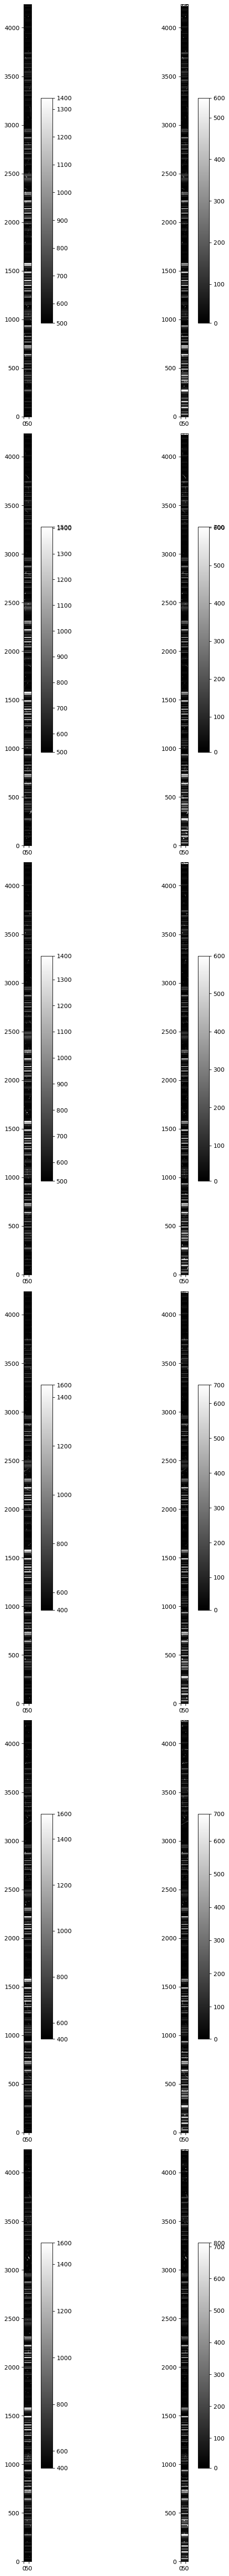

In [81]:
fig,axes=plt.subplots(6,2,figsize=(10,60),tight_layout=True)
for i in range(6):
    show_image(ccdp.trim_image(raw_ccd[i][:,22:99]), cmap='gray',ax=axes[i,0],fig=fig)
    show_image(ccdp.trim_image(reduced_ccd[i][:,22:99]),cmap='gray',ax=axes[i,1],fig=fig)

In [82]:
wc_path=Path('wc')
for i in range(6):
    objname="obj{}.fits".format(i+1)
    ccd=ccdp.trim_image(reduced_ccd[i][9:4200,22:99])
    ccd.write(wc_path / objname,overwrite=True)

In [83]:
wc_files=ccdp.ImageFileCollection(wc_path)

In [95]:
dudulu=cr_list[0]

In [99]:
print(dudulu.uncertainty.unit)
print(dudulu.unit)
print(dudulu.data.unit)

adu
electron
electron / adu


In [104]:
a=input_list[0]


In [110]:
a.uncertainty.unit

Unit("adu")

In [111]:
a.header

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                  -64 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                   77                                                  
NAXIS2  =                 4191                                                  
EXTEND  =                    T                                                  
ADC     =               24.370 / ADC PA during exposure (degree)                
ADC-STR =               24.370 / ADC PA at exposure start (degree)              
ADC-END =               25.750 / ADC PA at exposure end (degree)                
ADC-TYPE= 'IN      '           / ADC name/type if used                          
AIRMASS =                1.277 / Typical air mass during exposure               
AIRM-STR=                1.277 / Air mass at exposure start                     
AIRM-END=                1.3

In [102]:
from astropy import units as u
cr_list=[]
input_list=[]
for ccd,filename in wc_files.ccds(return_fname=True,masked=None,**{'data-typ':"object"}):
    input_list.append(ccd)
    new_ccd=ccdp.cosmicray_lacosmic(ccd,gain=2, readnoise=4, sigclip=4.5, sigfrac=0.5, objlim=1,niter=4)
    filename="CR_"+filename
    maskname="Msk_"+filename
    cr_list.append(new_ccd)
    
    new_ccd.write(wc_path / filename,overwrite=True)
    obj_cr=CCDData(data=new_ccd.data,unit=u.electron)
    obj_cr.meta=new_ccd.meta
    obj_cr.meta['masked']=True
    obj_cr.write(wc_path / filename,overwrite=True)
    #mask=CCDData(data=new_ccd.mask,unit=u.dimensionless_unscaled)
    #mask.meta=new_ccd.meta
    #mask.meta['data-typ']="MASK" 
    #mask.write(wc_path / maskname, overwrite=True)

this form of the PCi_ja keyword is deprecated, use PCi_ja. [astropy.wcs.wcs]
this form of the PCi_ja keyword is deprecated, use PCi_ja.
this form of the PCi_ja keyword is deprecated, use PCi_ja. [astropy.wcs.wcs]
this form of the PCi_ja keyword is deprecated, use PCi_ja.
this form of the PCi_ja keyword is deprecated, use PCi_ja. [astropy.wcs.wcs]
this form of the PCi_ja keyword is deprecated, use PCi_ja.
this form of the PCi_ja keyword is deprecated, use PCi_ja. [astropy.wcs.wcs]
this form of the PCi_ja keyword is deprecated, use PCi_ja.
the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
the RADECSYS keyword is deprecated, use RADESYSa.
Set DATE-END to '2019-05-12T12:46:07.176' from MJD-END'. [astropy.wcs.wcs]
Set DATE-END to '2019-05-12T12:46:07.176' from MJD-END'.
  'degree' -> 'deg'. [astropy.wcs.wcs]
  'degree' -> 'deg'.
INFO:astropy:An exception happened while extracting WCS information from the Header.
InconsistentAxisTypesError: ERROR 4 in wcs_types() at line 31

INFO: An exception happened while extracting WCS information from the Header.
InconsistentAxisTypesError: ERROR 4 in wcs_types() at line 3104 of file cextern/wcslib/C/wcs.c:
Unmatched celestial axes.
 [astropy.nddata.ccddata]


INFO:astropy:overwriting Quantity's current unit with specified unit.
Set DATE-END to '2019-05-12T13:06:36.283' from MJD-END'. [astropy.wcs.wcs]
Set DATE-END to '2019-05-12T13:06:36.283' from MJD-END'.
INFO:astropy:An exception happened while extracting WCS information from the Header.
InconsistentAxisTypesError: ERROR 4 in wcs_types() at line 3104 of file cextern/wcslib/C/wcs.c:
Unmatched celestial axes.



INFO: overwriting Quantity's current unit with specified unit. [astropy.nddata.nddata]
INFO: An exception happened while extracting WCS information from the Header.
InconsistentAxisTypesError: ERROR 4 in wcs_types() at line 3104 of file cextern/wcslib/C/wcs.c:
Unmatched celestial axes.
 [astropy.nddata.ccddata]


INFO:astropy:overwriting Quantity's current unit with specified unit.
Set DATE-END to '2019-05-12T13:27:05.831' from MJD-END'. [astropy.wcs.wcs]
Set DATE-END to '2019-05-12T13:27:05.831' from MJD-END'.
INFO:astropy:An exception happened while extracting WCS information from the Header.
InconsistentAxisTypesError: ERROR 4 in wcs_types() at line 3104 of file cextern/wcslib/C/wcs.c:
Unmatched celestial axes.



INFO: overwriting Quantity's current unit with specified unit. [astropy.nddata.nddata]
INFO: An exception happened while extracting WCS information from the Header.
InconsistentAxisTypesError: ERROR 4 in wcs_types() at line 3104 of file cextern/wcslib/C/wcs.c:
Unmatched celestial axes.
 [astropy.nddata.ccddata]


INFO:astropy:overwriting Quantity's current unit with specified unit.
Set DATE-END to '2019-05-12T13:47:34.349' from MJD-END'. [astropy.wcs.wcs]
Set DATE-END to '2019-05-12T13:47:34.349' from MJD-END'.
INFO:astropy:An exception happened while extracting WCS information from the Header.
InconsistentAxisTypesError: ERROR 4 in wcs_types() at line 3104 of file cextern/wcslib/C/wcs.c:
Unmatched celestial axes.



INFO: overwriting Quantity's current unit with specified unit. [astropy.nddata.nddata]
INFO: An exception happened while extracting WCS information from the Header.
InconsistentAxisTypesError: ERROR 4 in wcs_types() at line 3104 of file cextern/wcslib/C/wcs.c:
Unmatched celestial axes.
 [astropy.nddata.ccddata]


INFO:astropy:overwriting Quantity's current unit with specified unit.
Set DATE-END to '2019-05-12T14:08:02.797' from MJD-END'. [astropy.wcs.wcs]
Set DATE-END to '2019-05-12T14:08:02.797' from MJD-END'.
INFO:astropy:An exception happened while extracting WCS information from the Header.
InconsistentAxisTypesError: ERROR 4 in wcs_types() at line 3104 of file cextern/wcslib/C/wcs.c:
Unmatched celestial axes.



INFO: overwriting Quantity's current unit with specified unit. [astropy.nddata.nddata]
INFO: An exception happened while extracting WCS information from the Header.
InconsistentAxisTypesError: ERROR 4 in wcs_types() at line 3104 of file cextern/wcslib/C/wcs.c:
Unmatched celestial axes.
 [astropy.nddata.ccddata]


INFO:astropy:overwriting Quantity's current unit with specified unit.
Set DATE-END to '2019-05-12T14:28:31.998' from MJD-END'. [astropy.wcs.wcs]
Set DATE-END to '2019-05-12T14:28:31.998' from MJD-END'.
INFO:astropy:An exception happened while extracting WCS information from the Header.
InconsistentAxisTypesError: ERROR 4 in wcs_types() at line 3104 of file cextern/wcslib/C/wcs.c:
Unmatched celestial axes.



INFO: overwriting Quantity's current unit with specified unit. [astropy.nddata.nddata]
INFO: An exception happened while extracting WCS information from the Header.
InconsistentAxisTypesError: ERROR 4 in wcs_types() at line 3104 of file cextern/wcslib/C/wcs.c:
Unmatched celestial axes.
 [astropy.nddata.ccddata]


INFO:astropy:overwriting Quantity's current unit with specified unit.


INFO: overwriting Quantity's current unit with specified unit. [astropy.nddata.nddata]


In [85]:
wc_files.refresh()
wc_files.summary

file,simple,bitpix,naxis,naxis1,naxis2,adc,adc-str,adc-end,adc-type,airmass,airm-str,airm-end,altitude,alt-str,alt-end,azimuth,az-str,az-end,dataset,dec,sltc-dec,dom-hum,dom-hstr,dom-hend,dom-prs,dom-pstr,dom-pend,dom-tmp,dom-tstr,dom-tend,dom-wnd,dom-wstr,dom-wend,equinox,efp-min1,efp-min2,efp-rng1,efp-rng2,exp-id,foc-pos,foc-val,gain,insrot,inr-str,inr-end,inst-pa,instrume,m2-tip,m2-type,object,obs-aloc,observer,obs-mod,out-hum,out-hstr,out-hend,out-prs,out-pstr,out-pend,out-tmp,out-tstr,out-tend,out-wnd,out-wstr,out-wend,prop-id,ra,sltc-ra,secz,secz-str,secz-end,seeing,telescop,telfocus,transp,tran-str,tran-end,ut1-utc,weather,zd,zd-str,zd-end,bin-fct1,bin-fct2,blank,bunit,observat,data-typ,date-obs,dec2000,detector,det-id,detpxsz1,detpxsz2,det-tmp,dispaxis,dispersr,exptime,filter01,filter02,filter03,frameid,hst,hst-str,hst-end,lst,lst-str,lst-end,mjd,mjd-str,mjd-end,prd-min1,prd-min2,prd-rng1,prd-rng2,ra2000,slit,sltcpix1,sltcpix2,slt-len,slt-pa,slt-wid,timesys,ut,ut-str,ut-end,wavelen,wav-max,wav-min,crval1,crval2,crpix1,crpix2,cdelt1,cdelt2,pc001001,pc001002,pc002001,pc002002,longpole,ctype1,ctype2,cunit1,cunit2,cd1_1,cd1_2,cd2_1,cd2_2,f_fcsmod,f_wipe,f_read,c2val1,c2val2,c2pix1,c2pix2,c2elt1,c2elt2,p2001001,p2001002,p2002001,p2002002,c2ype1,c2ype2,c2nit1,c2nit2,wcs-orig,radecsys,masked,subtract_overscan,suboscan,trim_image,trimim,subtract_bias,subbias,flat_correct,flatcor,extend,bscale,bzero
str20,bool,int64,int64,int64,int64,float64,float64,float64,str2,float64,float64,float64,float64,float64,float64,float64,float64,float64,str5,str12,str12,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,int64,int64,int64,str12,str10,float64,float64,float64,float64,float64,float64,str5,str3,str6,str10,str11,str13,str8,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,str6,str12,str12,float64,float64,float64,float64,str6,str6,float64,float64,float64,float64,str4,float64,float64,float64,int64,int64,int64,str8,str4,str10,str10,str12,str3,int64,float64,float64,float64,int64,str10,float64,str4,str10,str4,str12,str12,str12,str12,str12,str12,str12,float64,float64,float64,int64,int64,int64,int64,str12,str10,float64,float64,float64,float64,float64,str3,str12,str12,str12,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,str8,str10,str6,str2,float64,float64,float64,float64,str8,str6,str6,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,str8,str8,str6,str6,str14,str3,object,object,object,object,object,object,object,object,object,object,object,object
CR_FCSA00209469.fits,True,-32,2,1104,4241,17.95,17.95,17.95,IN,1.163,1.163,1.163,59.3061,59.3061,59.3062,66.1895,66.1895,65.7305,DS000,+28:57:42.66,+28:57:42.66,24.6,24.6,24.6,621.9,621.9,621.9,277.85,277.85,277.85,0.0,0.0,0.0,2000.0,30,1,1066,4241,FCSE00209469,Cassegrain,-0.16,1.997,-188.6,-188.6,-18.8,-89.7,FOCAS,OFF,CS_OPT,BD+28D4211,Observation,Ono and Sakai,SPEC,23.7,23.7,24.3,621.9,621.9,621.9,277.45,277.45,277.45,2.0,2.0,1.5,o19101,21:51:03.252,21:51:03.252,1.163,1.163,1.163,0.0,Subaru,CS_OPT,1.0,1.0,1.0,-0.15717,Fine,30.6939,30.6939,30.6938,2,1,-32768,electron,NAOJ,COMPARISON,2019-05-12,+28:57:42.66,HPK,1,0.015,0.015,-100.699997,2,SCFCGRHD90,1.0,NONE,SCFCFLSO58,NONE,FCSA00209469,04:44:21.206,04:44:21.206,04:44:22.466,19:42:46.353,19:42:46.353,19:42:47.616,58615.61413251,58615.61413251,58615.61414709,59,1,2208,4241,21:51:03.252,SCFCSLLC08,0.0,0.0,300.0,89.7,0.5,UTC,14:44:21.206,14:44:21.206,14:44:22.466,750.0,655.0,655.0,327.7635498,28.96184921,-34.0,2041.0,0.1038,0.1038,1.0,0.0,0.0,1.0,180.0,RA---TAN,WAVELENGTH,degree,nm,0.2076,0.0,0.0,0.1038,SPEC,NORMAL,NORMAL,327.76355,28.96185,-34.0,2041.0,5.767e-05,2.883e-05,-0.99998978,0.00452039,-0.00452039,-0.99998978,RA---TAN,DEC--TAN,degree,degree,SUBARU Toolkit,FK5,True,--,--,--,--,--,--,--,--,--,--,--
CR_FCSA00209791.fits,True,-32,2,1104,4241,0.03,0.03,

this form of the PCi_ja keyword is deprecated, use PCi_ja. [astropy.wcs.wcs]
this form of the PCi_ja keyword is deprecated, use PCi_ja.
this form of the PCi_ja keyword is deprecated, use PCi_ja. [astropy.wcs.wcs]
this form of the PCi_ja keyword is deprecated, use PCi_ja.
this form of the PCi_ja keyword is deprecated, use PCi_ja. [astropy.wcs.wcs]
this form of the PCi_ja keyword is deprecated, use PCi_ja.
this form of the PCi_ja keyword is deprecated, use PCi_ja. [astropy.wcs.wcs]
this form of the PCi_ja keyword is deprecated, use PCi_ja.
the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
the RADECSYS keyword is deprecated, use RADESYSa.
Set DATE-END to '2019-05-12T12:46:07.176' from MJD-END'. [astropy.wcs.wcs]
Set DATE-END to '2019-05-12T12:46:07.176' from MJD-END'.
  'degree' -> 'deg'. [astropy.wcs.wcs]
  'degree' -> 'deg'.
INFO:astropy:An exception happened while extracting WCS information from the Header.
InconsistentAxisTypesError: ERROR 4 in wcs_types() at line 31

INFO: An exception happened while extracting WCS information from the Header.
InconsistentAxisTypesError: ERROR 4 in wcs_types() at line 3104 of file cextern/wcslib/C/wcs.c:
Unmatched celestial axes.
 [astropy.nddata.ccddata]
INFO: An exception happened while extracting WCS information from the Header.
InconsistentAxisTypesError: ERROR 4 in wcs_types() at line 3104 of file cextern/wcslib/C/wcs.c:
Unmatched celestial axes.
 [astropy.nddata.ccddata]
INFO: An exception happened while extracting WCS information from the Header.
InconsistentAxisTypesError: ERROR 4 in wcs_types() at line 3104 of file cextern/wcslib/C/wcs.c:
Unmatched celestial axes.
 [astropy.nddata.ccddata]
INFO: An exception happened while extracting WCS information from the Header.
InconsistentAxisTypesError: ERROR 4 in wcs_types() at line 3104 of file cextern/wcslib/C/wcs.c:
Unmatched celestial axes.
 [astropy.nddata.ccddata]


Set DATE-END to '2019-05-12T14:08:02.797' from MJD-END'. [astropy.wcs.wcs]
Set DATE-END to '2019-05-12T14:08:02.797' from MJD-END'.
INFO:astropy:An exception happened while extracting WCS information from the Header.
InconsistentAxisTypesError: ERROR 4 in wcs_types() at line 3104 of file cextern/wcslib/C/wcs.c:
Unmatched celestial axes.

Set DATE-END to '2019-05-12T14:28:31.998' from MJD-END'. [astropy.wcs.wcs]
Set DATE-END to '2019-05-12T14:28:31.998' from MJD-END'.
INFO:astropy:An exception happened while extracting WCS information from the Header.
InconsistentAxisTypesError: ERROR 4 in wcs_types() at line 3104 of file cextern/wcslib/C/wcs.c:
Unmatched celestial axes.



INFO: An exception happened while extracting WCS information from the Header.
InconsistentAxisTypesError: ERROR 4 in wcs_types() at line 3104 of file cextern/wcslib/C/wcs.c:
Unmatched celestial axes.
 [astropy.nddata.ccddata]
INFO: An exception happened while extracting WCS information from the Header.
InconsistentAxisTypesError: ERROR 4 in wcs_types() at line 3104 of file cextern/wcslib/C/wcs.c:
Unmatched celestial axes.
 [astropy.nddata.ccddata]


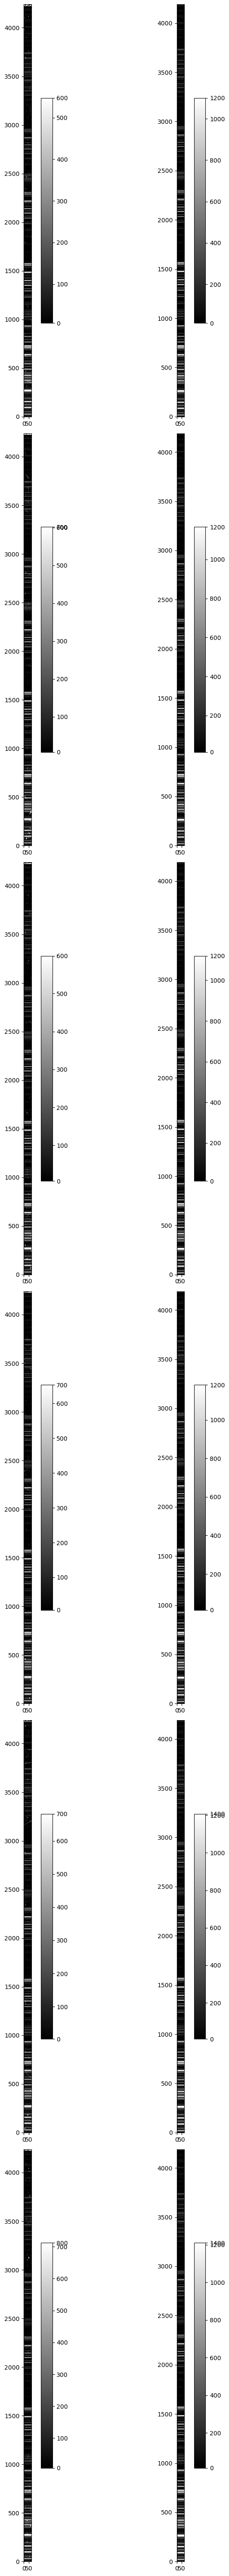

In [113]:
fig,axes=plt.subplots(6,2,figsize=(10,60),tight_layout=True)
cr_ccd=[]
for i, ccd in enumerate(wc_files.ccds(masked=True, **{'data-typ':'object'})):
    cr_ccd.append(ccd)
    show_image(ccdp.trim_image(reduced_ccd[i][:,22:99]), cmap='gray',ax=axes[i,0],fig=fig)
    show_image(ccd,cmap='gray',ax=axes[i,1],fig=fig)

<Figure size 400x1000 with 0 Axes>

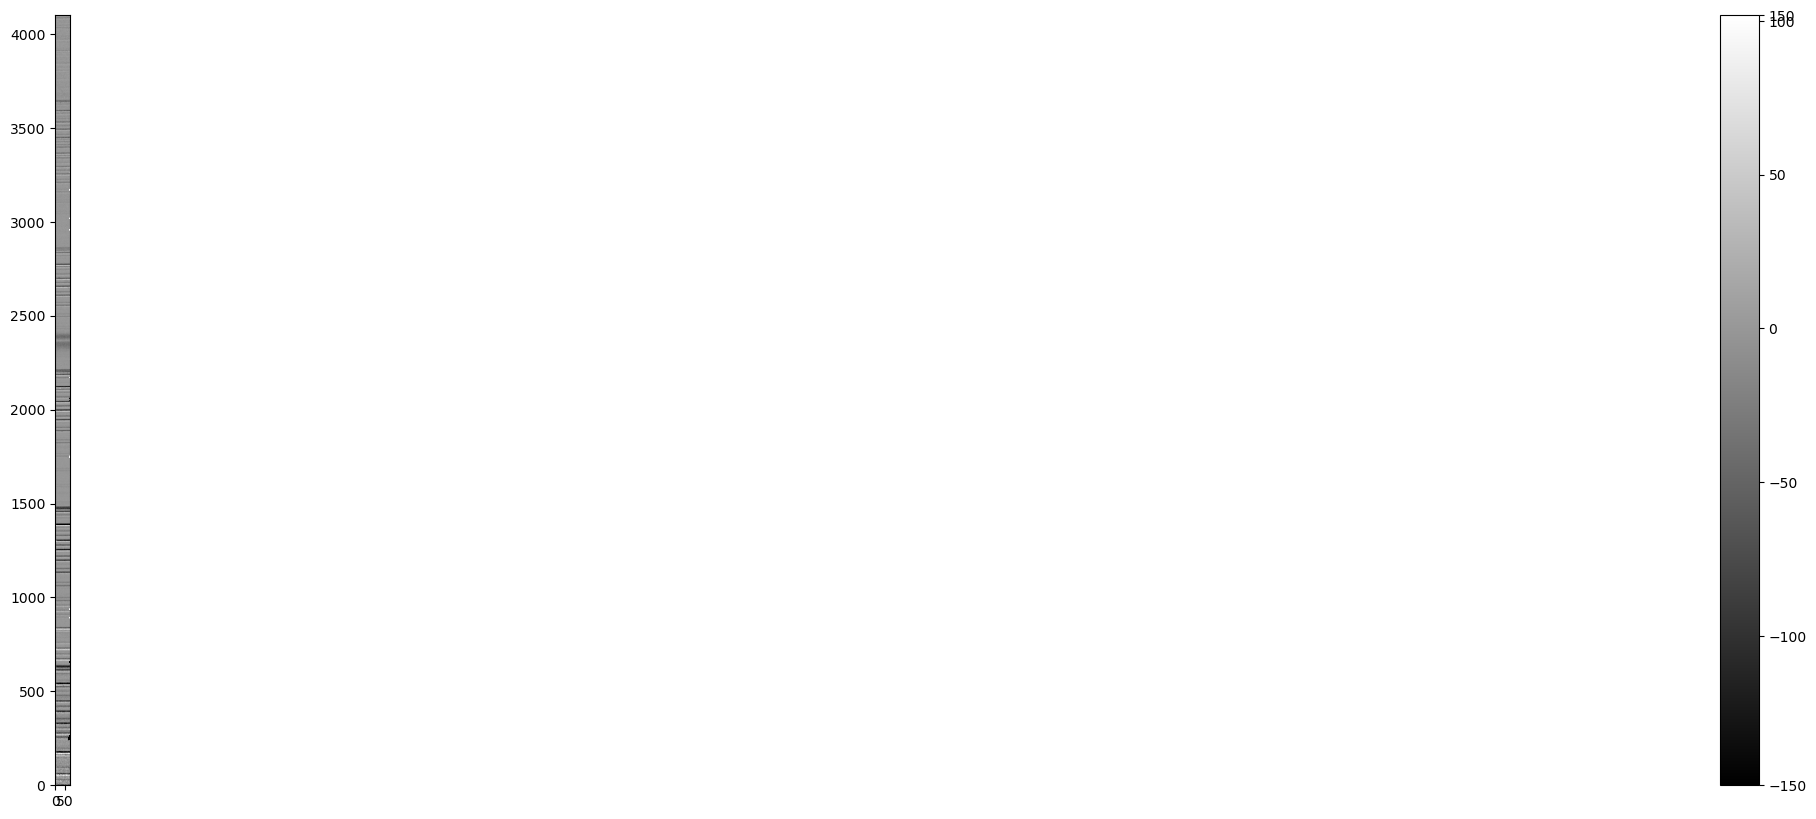

In [ ]:
plt.figure(figsize=(4,10))
show_image(ccdp.subtract_bias(cr_ccd[0],cr_ccd[1]),cmap="gray")

this form of the PCi_ja keyword is deprecated, use PCi_ja. [astropy.wcs.wcs]
this form of the PCi_ja keyword is deprecated, use PCi_ja.
this form of the PCi_ja keyword is deprecated, use PCi_ja. [astropy.wcs.wcs]
this form of the PCi_ja keyword is deprecated, use PCi_ja.
this form of the PCi_ja keyword is deprecated, use PCi_ja. [astropy.wcs.wcs]
this form of the PCi_ja keyword is deprecated, use PCi_ja.
this form of the PCi_ja keyword is deprecated, use PCi_ja. [astropy.wcs.wcs]
this form of the PCi_ja keyword is deprecated, use PCi_ja.
the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
the RADECSYS keyword is deprecated, use RADESYSa.
Set DATE-END to '2019-05-12T14:44:22.309' from MJD-END'. [astropy.wcs.wcs]
Set DATE-END to '2019-05-12T14:44:22.309' from MJD-END'.
  'degree' -> 'deg'. [astropy.wcs.wcs]
  'degree' -> 'deg'.
INFO:astropy:An exception happened while extracting WCS information from the Header.
InconsistentAxisTypesError: ERROR 4 in wcs_types() at line 31

INFO: An exception happened while extracting WCS information from the Header.
InconsistentAxisTypesError: ERROR 4 in wcs_types() at line 3104 of file cextern/wcslib/C/wcs.c:
Unmatched celestial axes.
 [astropy.nddata.ccddata]
INFO: An exception happened while extracting WCS information from the Header.
InconsistentAxisTypesError: ERROR 4 in wcs_types() at line 3104 of file cextern/wcslib/C/wcs.c:
Unmatched celestial axes.
 [astropy.nddata.ccddata]


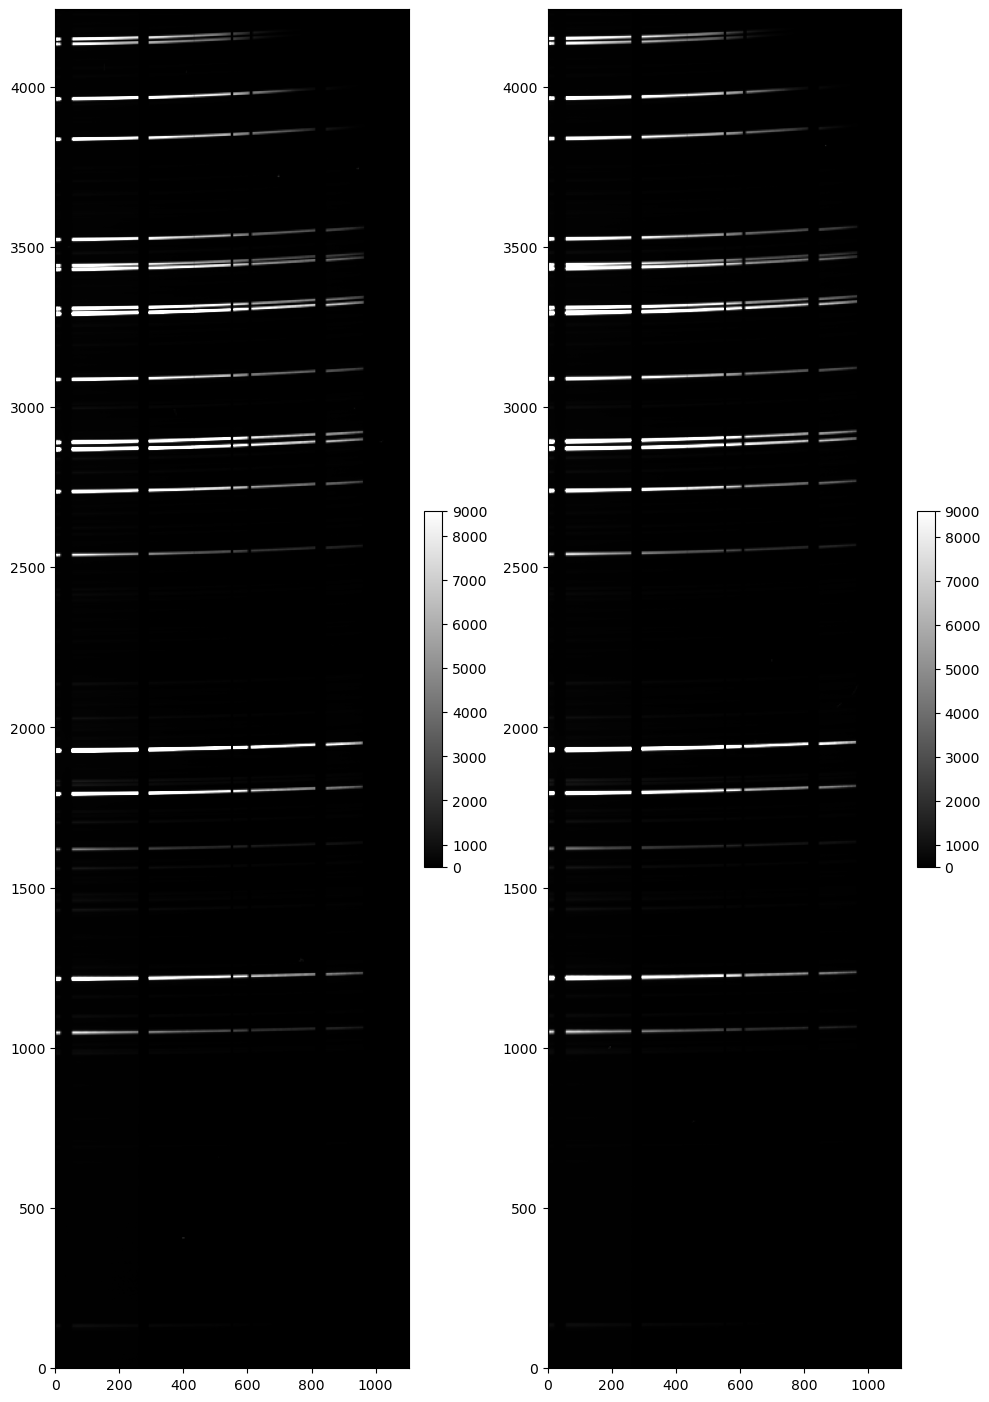

In [116]:
wc_files.refresh()
fig,axes=plt.subplots(1,2,figsize=(10,20),tight_layout=True)
cr_ccd=[]
for i, ccd in enumerate(wc_files.ccds(**{'data-typ':'COMPARISON'})):
    show_image(ccdp.trim_image(ccd),cmap='gray',ax=axes[i],fig=fig)

INFO:astropy:An exception happened while extracting WCS information from the Header.
InconsistentAxisTypesError: ERROR 4 in wcs_types() at line 3104 of file cextern/wcslib/C/wcs.c:
Unmatched celestial axes.

INFO:astropy:An exception happened while extracting WCS information from the Header.
InconsistentAxisTypesError: ERROR 4 in wcs_types() at line 3104 of file cextern/wcslib/C/wcs.c:
Unmatched celestial axes.



INFO: An exception happened while extracting WCS information from the Header.
InconsistentAxisTypesError: ERROR 4 in wcs_types() at line 3104 of file cextern/wcslib/C/wcs.c:
Unmatched celestial axes.
 [astropy.nddata.ccddata]
INFO: An exception happened while extracting WCS information from the Header.
InconsistentAxisTypesError: ERROR 4 in wcs_types() at line 3104 of file cextern/wcslib/C/wcs.c:
Unmatched celestial axes.
 [astropy.nddata.ccddata]


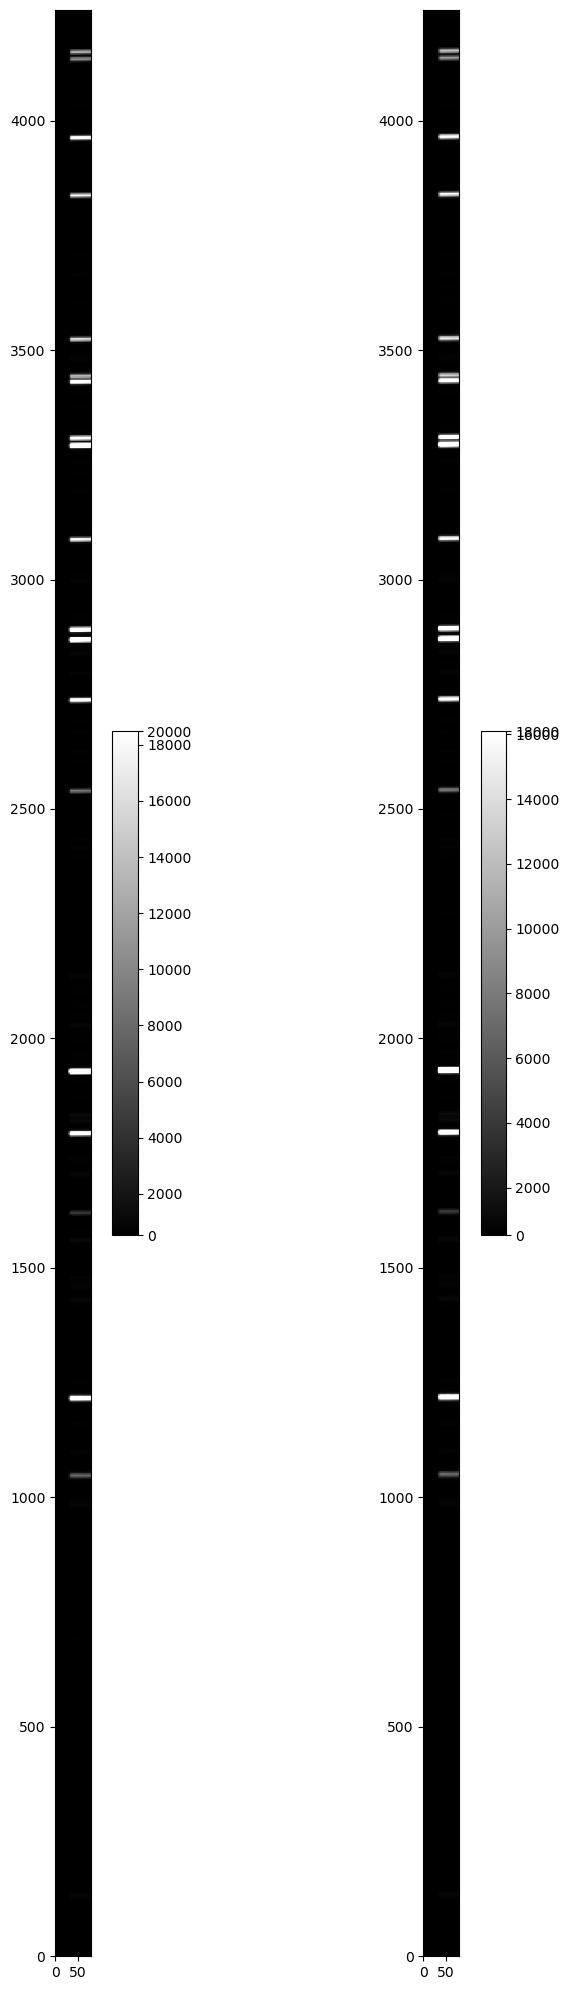

In [118]:
fig,axes=plt.subplots(1,2,figsize=(10,20),tight_layout=True)
cr_ccd=[]
for i, ccd in enumerate(wc_files.ccds(**{'data-typ':'COMPARISON'})):
    show_image(ccdp.trim_image(ccd[:,22:99]),cmap='gray',ax=axes[i],fig=fig)